# load_trawl_data

Author: Hayley

Load and vizualize the trawl data.

In [4]:
import sdm
import pandas as pd
import matplotlib.pyplot as plt
import cartopy
import numpy as np

In [2]:
df = sdm.load_trawl_data()
df

,TOWDATETIME_EST,LAT,LON,MEAN_DEPTH,SWEPT_AREA_km,acadian redfish,alewife,alligatorfish,american lobster,american plaice,...,Rrs_707,Rrs_708,Rrs_709,Rrs_711,Rrs_712,Rrs_713,Rrs_714,Rrs_717,Rrs_719,Rrs_brightness
0,2024-03-07 10:58:00,38.659194,-74.828083,24,0.021282,0.0,0.0,0.0,0.0,0.0,...,0.000851,0.000825,0.000797,0.000765,0.000738,0.000717,0.000689,0.000552,0.000540,1.090205
1,2024-03-07 14:32:00,38.498596,-74.477395,40,0.024311,0.0,0.0,0.0,0.0,0.0,...,0.000386,0.000378,0.000364,0.000344,0.000333,0.000325,0.000315,0.000229,0.000261,0.907649
2,2024-03-07 17:44:00,38.411974,-74.502885,39,0.023835,0.0,0.0,0.0,0.0,0.0,...,0.000372,0.000364,0.000350,0.000330,0.000318,0.000310,0.000292,0.000210,0.000254,0.935354
3,2024-03-07 20:29:00,38.505238,-74.832046,25,0.021510,0.0,0.0,0.0,1.0,0.0,...,0.000674,0.000653,0.000632,0.000606,0.000588,0.000574,0.000553,0.000430,0.000434,1.050127
4,2024-03-07 22:45:00,38.556784,-74.897495,21,0.019174,0.0,0.0,0.0,27.0,0.0,...,0.001309,0.001268,0.001221,0.001175,0.001134,0.001093,0.001046,0.000848,0.000791,1.327782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,2024-05-12 12:30:00,41.305711,-70.636614,23,0.018435,0.0,0.0,0.0,0.0,0.0,...,0.000283,0.000275,0.000266,0.000253,0.000246,0.000243,0.000237,0.000181,0.000218,0.529729
364,2024-05-12 18:45:00,40.467061,-71.381195,73,0.022568,0.0,2.0,0.0,2.0,0.0,...,0.000159,0.000155,0.000150,0.000142,0.000140,0.000137,0.000138,0.000097,0.000150,0.446814
365,2024-05-13 01:19:00,39.618178,-72.027289,219,0.024705,0.0,0.0,0.0,0.0,0.0,...,0.000108,0.000104,0.000102,0.000094,0.000093,0.000094,0.000095,0.000057,0.000104,0.450264
366,2024-05-13 03:42:00,39.762143,-72.213598,98,0.020737,0.0,1.0,0.0,0.0,0.0,...,0.000146,0.000143,0.000141,0.000134,0.000134,0.000133,0.000130,0.000068,0.000124,0.446797


## Most common species

Let's get species with abuncance > 50000.

In [6]:
matched=[]
for item in df.columns:
    if 'Rrs' in item:  # Using the 'in' operator for substring check
        pass
    else: 
        matched.append(item)

sub = df[list(matched)].copy() #subset (remove RRS columns) 
sub['station'] = np.arange(1,len(sub)+1) #add station col

tot_sum = {}
for s in sub.columns[5:-2]:
   tot_sum.update({s:int(sub[s].sum())})  #get total sum of all values 

sorted_tot_sum = sorted(tot_sum.items(), key=lambda item: item[1],reverse=True) #sort by max-->min


abu=[]
for val in sorted_tot_sum:
    if val[1]>50000: #if more than 50000 observations 
        abu.append(val[0])
abu

['butterfish',
 'silver hake',
 'longfin squid',
 'spot',
 'northern searobin',
 'atlantic croaker']

This is a single survey in 2024.

In [13]:
df['TOWDATETIME_EST'] = pd.to_datetime(df['TOWDATETIME_EST'])
df['TOWDATETIME_EST'].agg(['min', 'max'])

min   2024-03-07 10:58:00
max   2024-05-13 07:15:00
Name: TOWDATETIME_EST, dtype: datetime64[ns]

Each station appears once.

In [10]:
station_counts = sub['station'].value_counts().sort_index()
station_counts = station_counts.rename("count").reset_index()
station_counts.columns = ["station", "count"]
station_counts['count'].unique()

array([1])

## Make a plot

Look at the abundances by station. 

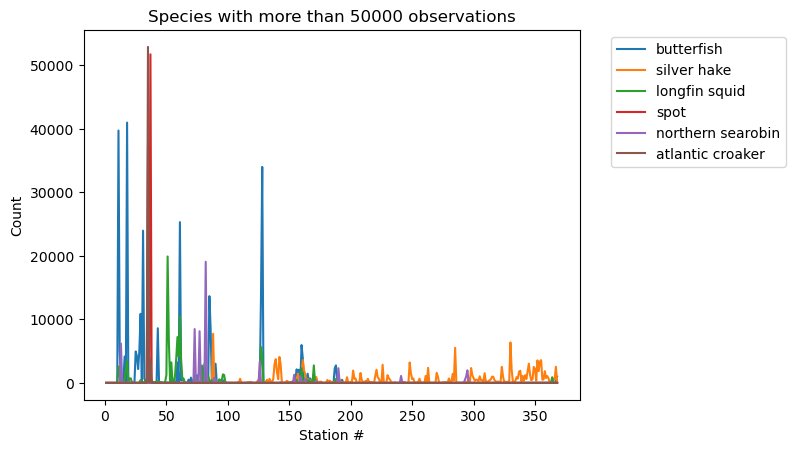

In [15]:
for s in sub[abu].columns:
    plt.plot(sub.station, sub[s],label=s)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', )
plt.xlabel('Station #')
plt.ylabel('Count')
plt.title('Species with more than 50000 observations')
plt.show()

Map the species presence/absence by station location.

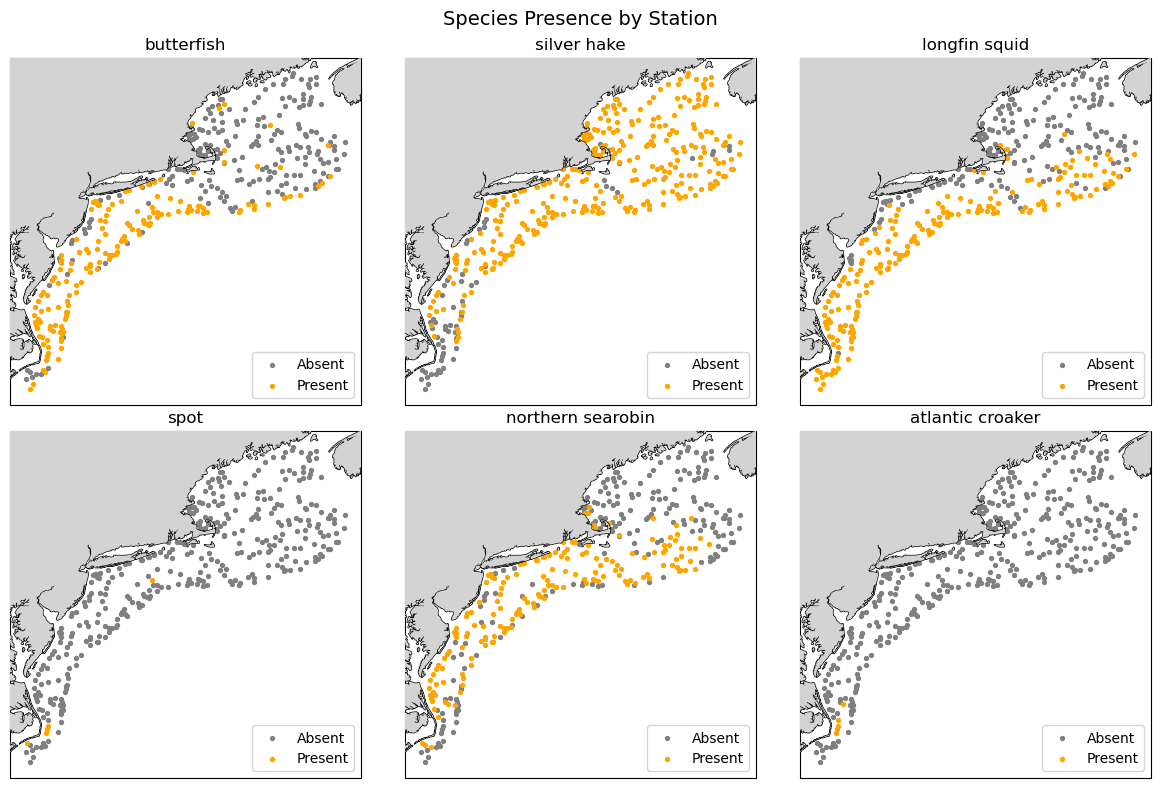

In [22]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig, axs = plt.subplots(2, 3, figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()

absent_color = 'gray'
present_color = 'orange'

for i, ax in enumerate(axs):
    species = sub[abu].columns[i]
    absent = sub[sub[species] == 0]
    present = sub[sub[species] != 0]

    ax.scatter(absent.LON, absent.LAT, c=absent_color, s=8, label='Absent')
    ax.scatter(present.LON, present.LAT, c=present_color, s=8, label='Present')

    ax.add_feature(cfeature.COASTLINE, linewidth=1)
    ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey')
    ax.set_title(species)

    # Add legend only to the first subplot to avoid repetition
    ax.legend(loc='lower right')

fig.suptitle('Species Presence by Station', fontsize=14)
plt.tight_layout()
plt.show()
